# EMNLP, CoNLL, ACL 학회 데이터 통합하기

In [13]:
import pandas as pd

# 각 학회 데이터 읽기
emnlp = pd.read_csv("processed_file_EMNLP.csv")
conll = pd.read_csv("processed_file_coNLL.csv")
acl = pd.read_csv("processed_file_acl.csv")

# 학회 정보 추가
emnlp['Year Folder'] = 'EMNLP'
conll['Year Folder'] = 'CoNLL'
acl['Year Folder'] = 'ACL'

# 데이터 통합
all_data = pd.concat([emnlp, conll, acl], ignore_index=True)

# 통합 데이터 저장
all_data.to_csv("Combined_Data.csv", index=False)

C:\Users\wpgur\AppData\Local\Temp\ipykernel_25060\3762132451.py:4: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,

# 통합 데이터 정제

In [9]:
import pandas as pd

# CSV 파일 읽기
file_path = "C:/Users/wpgur/Desktop/processed_file_1211.csv"  # 파일 경로를 여기에 입력하세요
df = pd.read_csv(file_path)

# 1. Year Folder 열에서 결측값 제거
df = df.dropna(subset=['Year Folder'])

# 2. Year Folder 열에서 '_'가 포함되지 않은 비정상 데이터 제거
df = df[df['Year Folder'].str.contains('_', na=False)]

# 3. Year Folder 열에서 학회와 연도 분리
df[['Conference', 'Year']] = df['Year Folder'].str.split('_', expand=True)

# 4. 결과 확인
print(df.head())

# 5. 결과를 새로운 CSV 파일로 저장
output_file = "processed_file_EMNLP.csv"
df.to_csv(output_file, index=False)
print(f"파일이 저장되었습니다: {output_file}")

C:\Users\wpgur\AppData\Local\Temp\ipykernel_25060\3365440200.py:5: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,

  Year Folder     File Name  \
0  EMNLP_2000  W00-1301.pdf   
1  EMNLP_2000  W00-1302.pdf   
2  EMNLP_2000  W00-1303.pdf   
3  EMNLP_2000  W00-1304.pdf   
4  EMNLP_2000  W00-1305.pdf   

                                               Title  \
0  Pattern-Based Disambiguation for Natural Langu...   
1  What's yours and what's mine: Determining Inte...   
2  Japanese Dependency Structure Analysis Based o...   
3  Coaxing Confidences from an Old Friend: Probab...   
4        Topic Analysis Using a Finite Mixture Model   

                                           processed Unnamed: 4 Unnamed: 5  \
0  insight speech recognit naturallanguag process...        NaN        NaN   
1  power research approachwhen write articl one n...        NaN        NaN   
2  svm cort vapnik vapdepend structur analysi rec...        NaN        NaN   
3  segment messag understandin natur languag proc...        NaN        NaN   
4  iti distribut topic topic distributionth secon...        NaN        NaN   

  Unnam

# 텍스트 전처리 및 2D 클러스터 진행

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wpgur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wpgur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\wpgur\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
C:\Users\wpgur\AppData\Local\Temp\ipykernel_15424\4043002485.py:67: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,12

Top terms for each cluster:
Cluster 0: trees, pos, segmentation, translations, categories, frequency, clusters, discourse, classifiers, parsers
Cluster 1: bert, encoder, summarization, gpt, llms, transformer, decoder, summaries, transformers, retrieval
Cluster 2: languag, gener, sentenc, tabl, perform, inform, comput, page, featur, evalu


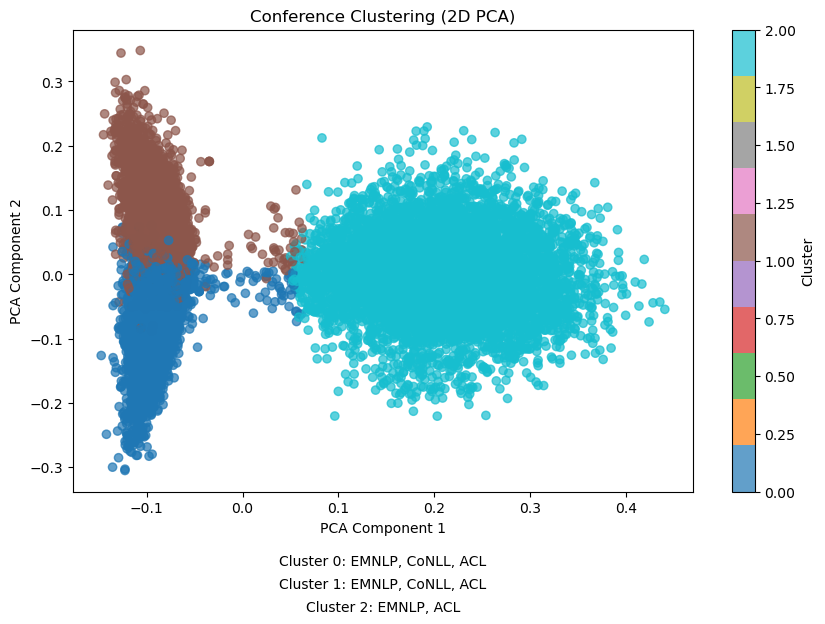

In [39]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
# NLTK 불용어 로드
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
# 사용자 정의 불용어 리스트 추가
custom_stopwords = [
'et', 'al', '1', '2', '3', '4', '5', '6', '0', 'w', 'x', 'e', 'r', 'p', 'b', 'c', 'f', 'g', 'h', 'j', 'k', 'l', 'm', 'n', 'o', 's', 't', 'u', 'v', 'y', 'z',
    '2019', '2020', '2021', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000', 'task', 'results', 'set', 'use', 'using', 'based', 'methods', 'method', 'training', 'learning', 'language', 'word', 'dataset', 
    'sentence', 'system', 'figure', 'table', 'model', 'models', 'text', 'input', 'performance', 'test', 'work', 'test', 'example', 'approach', 'evaluation', 'corpus', 'knowledge', 'entity', 'experiments', 'systems', 'given', 'show', 'first', 'new', 
    'question', 'target', 'information', 'pages', 'sentences', 'task', 'different', 'number', 'based', 'sentence', '%', '=', '[', ']', '>', '<', '*', 'q', 'data', 'proceedings', 'words', 'translation', 'conference', 'association', 'tasks', 'machine', 
    'datasets', 'section', 'attention', 'source', 'size', 'features', 'classification', 'analysis', 'time', 'paper', 'generation', 'linguistics', 'score', 'output', 'sequence', 'accuarcy', 'research', 'order', 'representation', 'chen', 'tion', 'embeddings', 
    'case''accuracy', 'representations', '±', 'θ', '+', 'loss', 'network' , 'problem', 'relation', 'cid', 'cidcid', 're', 'pre',
    'zhang', 'questions', 'similarity', '|', 'function', 'entities', 'pairs', 'labels', 'baseline', 'vector', '@', 'feature', 'parameters', 'cid:1', 'processing', 'wang', 'e.g', 'scores', 'types', 'distribution', 'accuracy', 'case', 'cases', 'layer', 'networks', 'prediction', 'terms', 'term', 'quality', 'documents', 'document', 'relations',
    'process', 'probability', 'metrics', 'cid:48', 'li', 'value', 'detection', 'news', 'state', 'extraction', 'context', 'rate', 'domain', 'structure', 'volume', 'cid:0', 'f1', 'space', 'steps', 'step', 'sets', 'set',
    'event', 'liu', 'image', 'part', 'cid:88', 'papers', 'precision', 'cid:2', 'search', 'class', 'examples', 'pair', 'vectors', 'cid:13', 'label', 'inference', 'graph', 'bleu', 'samples', 'framework', 'frameworks', 'annotation', 'layers', 'way',
    'length', 'development', 'addition', 'cid:16', 'tokens', 'type', 'study', 'base', 'values', 'level', 'cid:9', 'instance' 'sentiment', 'cid:3', 'dependency', 'dialogue', 'topic', 'approaches', 'yang', 'recognition', 'query', 'comparison', 'errors', 'error', 'meeting', 'fact', 'result', 'rules', 'rule', 'chapter', 'lee', 'chang', 'selection', 'speech',
    'instance', 'sentiment', 'instances', 'cid:12', 'code', 'effect', 'cid:10', 'languages', 'baselines', 'users', 'answer', 'improvement', 'α', 'weights', 'memory', 'm.', 'architecture', 'role', 'studies', 'topics', 'tweets', 'mask', 'phrase', 'goal', 'validation',
    'response', 'distance', 'strategy', 'cls', 'difference', 'a.', 'evidence', 'list', 'answers', 'reference', 'settings', 'cid:15', 'j.', 'candidate', 'techniques', 'ability', 'kenton', 'line', 'wu', 'i.e', 'name', 'xu', 'position',
    'annotators', 'cid:17', 'module', 'tions', 'train', 'queries', 'recall', 'sence', 'log', 'form', 'group', 'annotations', 'details', 'longpapers', 'times', 'https', 'points', 'devlin', '/', 'lin',
    'sense', 'workshop', 'correlation', 'version', 'corr', 'hand', 'statistics', 'zhou', 'references', 'resources', 'michael', 'd.', 'mechanism', 'huang', 'events', 'corpora', 'mt', 'cid:11', 'character', 'λ',
    'parser', 'christopher', 'technologies', 'media', 'head', '·', 'note', 'states', 'agreement', 'cid:8', 'algorithm', 'findings', 'cid:5', 'characters', 'problems', 'candidates', 'improvements', 'person'
    'action','nodes', 'acc', 'measure', 'cid:80', 'yu', 'style', 'people', 'cidcidcid', 'cidcid','cid'
    'action', 'person', 'cid:18', 'components', 'authors', 'david', 'mentions', 'collection', 'verb', 'cid:4', 'contrast', 'amount',
    'science', 'wei', 'cid:7', 'kim', 'max', 'clark', 'r.', 'identification', 'support', 'patterns', 'cost', 'advances', 'point', 'batch', 'β',
    'article', 'user', 'category', 'units', 'articles', 'ii', 'world', 'sources', 'hence', 'classes',
    'parameter', 'stage', 'product', 'end', 'john', 'functions', 'ba', 'sep', 'differences', 'computer', 'strategies',
    'vaswani', 'mark', 'cid:19', 'alignment', 'bias', 'reason', 'numbers', 'constraints', 'pipeline', '..',
    'ones', 'zhao', 'daniel', 'c.', 'sun', 'mention', 'augmentation', 'comments', 'content',
    'le', 'gao', 'years', 'count', 'gold', 'conclusion', 'prompts', 'emnlp', 'ner', 'impact', 's.',
    'utterances', 'groups', 'idea', 'semantics', 'cid:107', 'estimation', 'cid:21', 'limitations', 'cid', 'cidcid',
    'texts', 'complexity', 'images', 'concepts', 'adam', 'importance', 'others', 'policy', 'arguments', 'sample', 'zhu', 'qa', 'relevance', 'challenge', 'inaddition', 'procedure', 'intelligence', 'choice', 'jones', 'cid:6','dev', 'range',
    'equation', 'dimension', 'history', 'definition', 'issue', 'roberta', 'p.','twitter', 'field', 'gender', 'confidence', 'slot', 'parts', 'distributions', 'tags',
    'argument', 'phrases', 'none', 'kingma', 'location', 'utterance', 'diversity', 'levy', 'cid:105', 'forms', '···', 'ij', 'student', 'forinstance', 'tool', 'coverage', 'passage', 'gap', 'program', 'relationship', 'implementation',
    'wikipedia', 'report', 'variants', 'responses', 'names', 'resolution', 'zettlemoyer', 'expressions', 'direction', 'edge', 'technique', 'generalization', 'noise', 'comprehension', 'path', 'cid:104', 'random', 'ground', 'levels', 'inproceedings', 'effects', 'claim',
    'review', 'cid:22', 'hu', 'items', 'side', 'sides', 'grammar', 'richard', 'lines', 'da', 'opinion', 'design', 'issues', 'ways', 'lm', 'jiang', 'ee', 'access', 'factors', 'ratio', 'unit', 'properties', 'computation', 'health', 'cid:20', 'majority', 'change', 'cid:29', 'technology', 'actions', 'joshi', 'changes', 'ablation', 'effectiveness', 'split', 'application', 'te', 'vision',
    'interaction', 'percentage','ie','P0','PO', 'web', 'llion', 'man', 'van', 'parmar', 'span', 'practice', 'age', 'variety', 'node', 'sutskever', 'success','china', ' ', 'aspects', 'researchers', 'em', 'h.', 'interest', 'match', 'project', 'min', 't.', 'spans', 'phase','story', 'chris', 'jason', 'cs', 'truth', 'concept'
]

# NLTK의 불용어 리스트와 통합
all_stopwords = set(stopwords.words('english') + custom_stopwords)

# 텍스트 전처리 함수
def preprocess_text(text):
    # 공백, 숫자, 특수문자 제거
    text = re.sub(r'[^\w\s]', '', text)  # 특수문자 제거
    text = re.sub(r'\d+', '', text)      # 숫자 제거
    text = re.sub(r'\s+', ' ', text).strip()  # 공백 제거
    # 소문자로 변환 및 불용어 제거
    tokens = word_tokenize(text.lower())  # 소문자로 변환 후 토큰화
    filtered_tokens = [word for word in tokens if word not in all_stopwords]  # 불용어 제거
    # 명사만 추출
    tagged_words = pos_tag(filtered_tokens)
    nouns = [word for word, tag in tagged_words if tag in ['NN', 'NNS', 'NNP', 'NNPS']]
    return ' '.join(nouns)  # 다시 문자열로 결합

# 통합 데이터 로드
all_data = pd.read_csv("Combined_Conference_Data2.csv")

# 'processed' 열의 결측값 제거
all_data = all_data.dropna(subset=['processed'])

# 전처리 적용
all_data['processed'] = all_data['processed'].apply(preprocess_text)

# TF-IDF 벡터화
vectorizer = TfidfVectorizer(stop_words=None, max_features=5000)  # stop_words는 이미 제거되었으므로 None으로 설정
X = vectorizer.fit_transform(all_data['processed'])

#클러스터링: 학회 기준 (Year Folder)
num_clusters = all_data['Year Folder'].nunique()  # 학회 수만큼 클러스터 생성
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(X)

#클러스터 결과를 데이터프레임에 추가
all_data['Cluster'] = labels

# 클러스터별 상위 TF-IDF 단어 출력 함수
terms = vectorizer.get_feature_names_out()

def get_top_terms(cluster_centers, terms, n=10):
    top_terms = []
    for i, cluster_center in enumerate(cluster_centers):
        sorted_indices = cluster_center.argsort()[-n:][::-1]
        top_terms.append([terms[idx] for idx in sorted_indices])
    return top_terms

# 클러스터별 상위 TF-IDF 단어 출력
print("Top terms for each cluster:")
top_terms = get_top_terms(kmeans.cluster_centers_, terms)
for idx, terms_list in enumerate(top_terms):
    print(f"Cluster {idx}: {', '.join(terms_list)}")

# 데이터 저장
all_data.to_csv("Clustered_Conference_Data_with_Preprocessed.csv", index=False)

# PCA로 차원 축소 후 2D 시각화
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', alpha=0.7)

# 클러스터별 학회 이름 매핑 (클러스터 0, 클러스터 1, 클러스터 2...)
cluster_names = all_data.groupby('Cluster')['Year Folder'].unique()

# 각 클러스터에 대한 텍스트 추가
cluster_labels = [f"Cluster {i}: {', '.join(names)}" for i, names in enumerate(cluster_names)]

# 범례 대신 클러스터 이름을 하단에 텍스트로 추가
for i, label in enumerate(cluster_labels):
    plt.text(0.5, -0.15 - (i * 0.05), label, ha='center', va='center', fontsize=10, transform=plt.gca().transAxes)

plt.title("Conference Clustering (2D PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label="Cluster")
plt.show()

C:\Users\wpgur\AppData\Local\Temp\ipykernel_15424\1318502333.py:8: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,

Top terms for each cluster:
Cluster 0: cid, al, words, features, data, translation, used, 2018, 2016, 2017
Cluster 1: al, 2020, 2019, 2021, 2022, 2023, 2018, 2017, bert, 10
Cluster 2: use, model, languag, sentenc, tabl, word, translat, gener, train, set


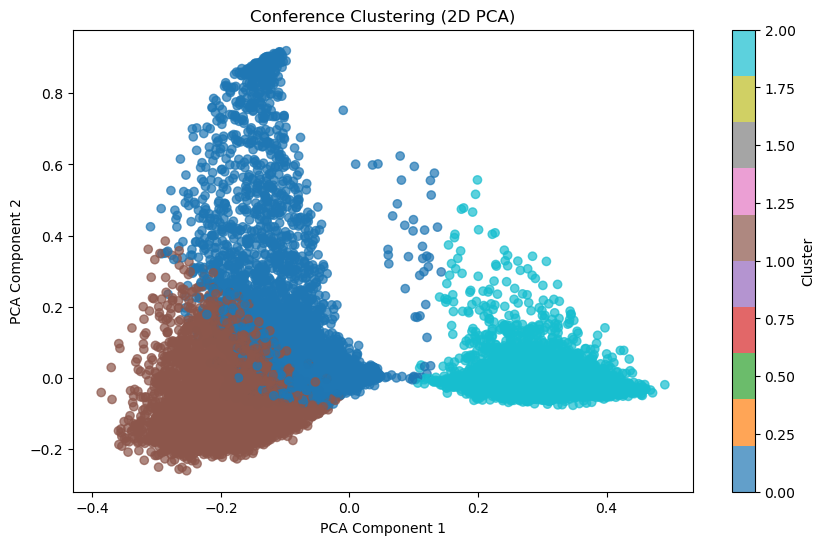

In [23]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 통합 데이터 로드
all_data = pd.read_csv("Combined_Conference_Data2.csv")

# 'processed' 열의 결측값 제거
all_data = all_data.dropna(subset=['processed'])

# TF-IDF 벡터화
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(all_data['processed'])

# 클러스터링: 학회 기준 (Year Folder)
num_clusters = all_data['Year Folder'].nunique()  # 학회 수만큼 클러스터 생성
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(X)

# 클러스터 결과를 데이터프레임에 추가
all_data['Cluster'] = labels

# 클러스터별 상위 TF-IDF 단어 출력 함수
terms = vectorizer.get_feature_names_out()

def get_top_terms(cluster_centers, terms, n=10):
    top_terms = []
    for i, cluster_center in enumerate(cluster_centers):
        sorted_indices = cluster_center.argsort()[-n:][::-1]
        top_terms.append([terms[idx] for idx in sorted_indices])
    return top_terms

# 클러스터별 상위 TF-IDF 단어 출력
print("Top terms for each cluster:")
top_terms = get_top_terms(kmeans.cluster_centers_, terms)
for idx, terms_list in enumerate(top_terms):
    print(f"Cluster {idx}: {', '.join(terms_list)}")

# 데이터 저장
all_data.to_csv("Clustered_Conference_Data_with_Year_Folder.csv", index=False)

# PCA로 차원 축소 후 2D 시각화
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', alpha=0.7)
plt.title("Conference Clustering (2D PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label="Cluster")
plt.show()

# 통합데이터 키워드간 관계 그래프(networkX)

C:\Users\wpgur\AppData\Local\Temp\ipykernel_26288\3369658859.py:7: DtypeWarning: Columns (5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,25

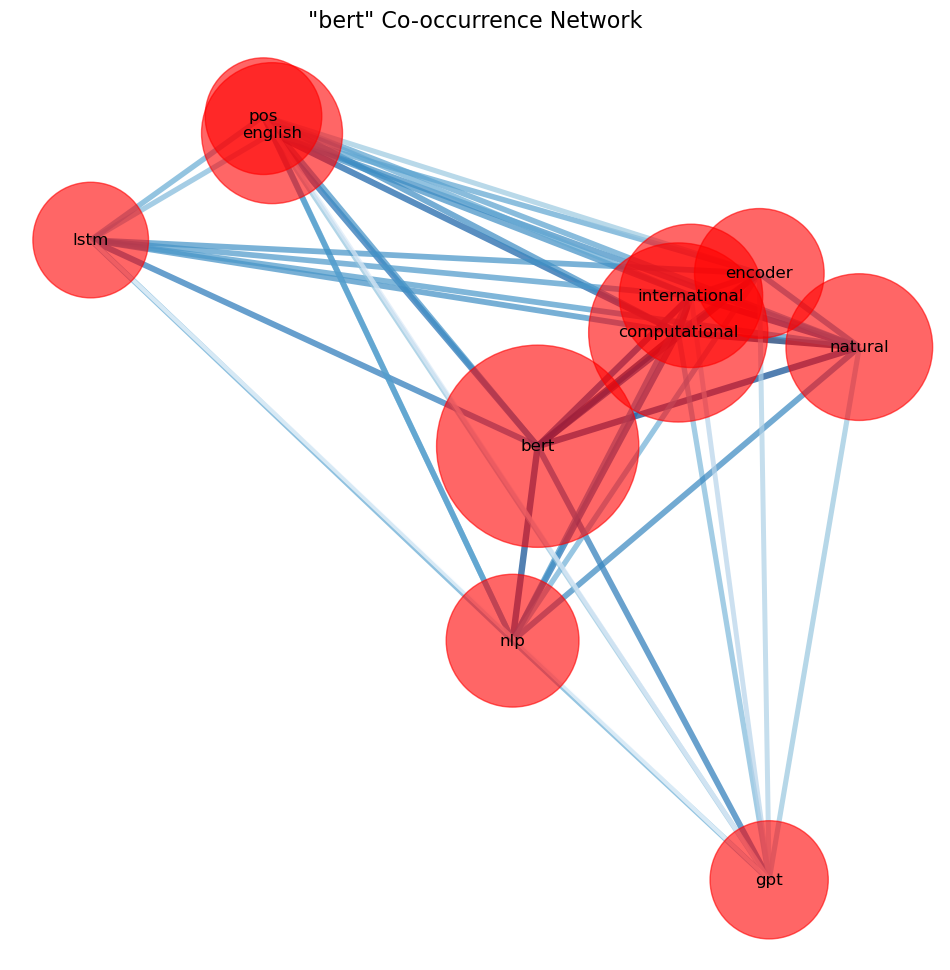

In [66]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

df = pd.read_csv('Combined_Conference_Data2.csv')  # 전처리된 파일 경로
text_data = df['processed'].dropna().tolist()
# 1. CountVectorizer를 사용하여 단어 간의 공동 발생 행렬 생성
vectorizer = CountVectorizer(stop_words='english', token_pattern=r'\b\w+\b')  # 불용어 제거
X = vectorizer.fit_transform(text_data)
word_freq = np.asarray(X.sum(axis=0)).flatten()
# 상위 10개의 단어 선택
top_n = 10
top_indices = word_freq.argsort()[-top_n:][::-1]  # 빈도가 높은 상위 5개의 인덱스를 선택
top_words = np.array(vectorizer.get_feature_names_out())[top_indices]

X_top = X[:, top_indices]

co_occurrence_matrix = (X_top.T * X_top)  # Transpose와 곱셈으로 공동 발생 행렬 생성
co_occurrence_matrix.setdiag(0)  # 자기 자신과의 연결은 제외

G = nx.Graph()

#단어와 연결을 그래프에 추가
for i in range(len(top_words)):
    for j in range(i + 1, len(top_words)):  # 중복 연결 방지
        weight = co_occurrence_matrix[i, j]
        if weight > 0:  # 공동 발생 빈도가 0인 연결은 제외
            G.add_edge(top_words[i], top_words[j], weight=weight)

#"bert"와 관련된 단어들만 추출하여 서브그래프 생성
center_word = 'bert'
neighbors = list(G.neighbors(center_word))  #bert와 연결된 단어들
subgraph_nodes = [center_word] + neighbors #서브 그래프 생성
subgraph = G.subgraph(subgraph_nodes)

#각 단어의 빈도수에 맞게 노드 크기 설정
node_size = []
for word in subgraph_nodes:
    word_index = np.where(vectorizer.get_feature_names_out() == word)[0][0]  # word의 인덱스를 찾기
    node_size.append(word_freq[word_index] * 2)  # 빈도수에 비례하여 크기 설정

#시각화
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(subgraph, k=0.2, iterations=50)  # 그래프 레이아웃 설정

#엣지의 가중치에 따라 두께와 색상 설정
edges = subgraph.edges(data=True)
edge_width = [np.log(edge[2]['weight']) * 0.5 for edge in edges]  # 엣지 두께
edge_color = [np.log(edge[2]['weight']) for edge in edges]  # 엣지 색상

node_color = 'red'

nx.draw_networkx_nodes(subgraph, pos, node_size=node_size, node_color=node_color, alpha=0.6)
nx.draw_networkx_edges(subgraph, pos, width=edge_width, alpha=0.7, edge_color=edge_color, edge_cmap=plt.cm.Blues)  # 엣지 색상
nx.draw_networkx_labels(subgraph, pos, font_size=12, font_color='black')

plt.title(f'"{center_word}" Co-occurrence Network', fontsize=16)
plt.axis('off')
plt.show()


# TOP 20 키워드 추출

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer  # WordNetLemmatizer 추가
from nltk import pos_tag
from tqdm import tqdm

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')  # WordNetLemmatizer 사용을 위한 다운로드

# CSV 데이터 불러오기
data = pd.read_csv("C:/Users/wpgur/Desktop/Combined_Data2.csv")

# 열 이름 확인 및 필요한 열 선택
print("Columns in the CSV file:", data.columns)
data = data[['Conference', 'Year', 'processed']]  # 실제 열 이름에 맞게 수정

# 1. 데이터 전처리 (NaN 값 및 비문자 데이터 처리)
data['processed'] = data['processed'].fillna('')  # NaN 값을 빈 문자열로 대체
data['processed'] = data['processed'].astype(str)  # 모든 데이터를 문자열로 변환

# 사용자 정의 불용어 리스트 추가
custom_stopwords = [
'et', 'al', '1', '2', '3', '4', '5', '6', '0', 'w', 'x', 'e', 'r', 'p', 'b', 'c', 'f', 'g', 'h', 'j', 'k', 'l', 'm', 'n', 'o', 's', 't', 'u', 'v', 'y', 'z',
    '2019', '2020', '2021', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000', 'task', 'results', 'set', 'use', 'using', 'based', 'methods', 'method', 'training', 'learning', 'language', 'word', 'dataset', 
    'sentence', 'system', 'figure', 'table', 'model', 'models', 'text', 'input', 'performance', 'test', 'work', 'test', 'example', 'approach', 'evaluation', 'corpus', 'knowledge', 'entity', 'experiments', 'systems', 'given', 'show', 'first', 'new', 
    'question', 'target', 'information', 'pages', 'sentences', 'task', 'different', 'number', 'based', 'sentence', '%', '=', '[', ']', '>', '<', '*', 'q', 'data', 'proceedings', 'words', 'translation', 'conference', 'association', 'tasks', 'machine', 
    'datasets', 'section', 'attention', 'source', 'size', 'features', 'classification', 'analysis', 'time', 'paper', 'generation', 'linguistics', 'score', 'output', 'sequence', 'accuarcy', 'research', 'order', 'representation', 'chen', 'tion', 'embeddings', 
    'case''accuracy', 'representations', '±', 'θ', '+', 'loss', 'network' , 'problem', 'relation', 'cid', 'cidcid', 're', 'pre',
    'zhang', 'questions', 'similarity', '|', 'function', 'entities', 'pairs', 'labels', 'baseline', 'vector', '@', 'feature', 'parameters', 'cid:1', 'processing', 'wang', 'e.g', 'scores', 'types', 'distribution', 'accuracy', 'case', 'cases', 'layer', 'networks', 'prediction', 'terms', 'term', 'quality', 'documents', 'document', 'relations',
    'process', 'probability', 'metrics', 'cid:48', 'li', 'value', 'detection', 'news', 'state', 'extraction', 'context', 'rate', 'domain', 'structure', 'volume', 'cid:0', 'f1', 'space', 'steps', 'step', 'sets', 'set',
    'event', 'liu', 'image', 'part', 'cid:88', 'papers', 'precision', 'cid:2', 'search', 'class', 'examples', 'pair', 'vectors', 'cid:13', 'label', 'inference', 'graph', 'bleu', 'samples', 'framework', 'frameworks', 'annotation', 'layers', 'way',
    'length', 'development', 'addition', 'cid:16', 'tokens', 'type', 'study', 'base', 'values', 'level', 'cid:9', 'instance' 'sentiment', 'cid:3', 'dependency', 'dialogue', 'topic', 'approaches', 'yang', 'recognition', 'query', 'comparison', 'errors', 'error', 'meeting', 'fact', 'result', 'rules', 'rule', 'chapter', 'lee', 'chang', 'selection', 'speech',
    'instance', 'sentiment', 'instances', 'cid:12', 'code', 'effect', 'cid:10', 'languages', 'baselines', 'users', 'answer', 'improvement', 'α', 'weights', 'memory', 'm.', 'architecture', 'role', 'studies', 'topics', 'tweets', 'mask', 'phrase', 'goal', 'validation',
    'response', 'distance', 'strategy', 'cls', 'difference', 'a.', 'evidence', 'list', 'answers', 'reference', 'settings', 'cid:15', 'j.', 'candidate', 'techniques', 'ability', 'kenton', 'line', 'wu', 'i.e', 'name', 'xu', 'position',
    'annotators', 'cid:17', 'module', 'tions', 'train', 'queries', 'recall', 'sence', 'log', 'form', 'group', 'annotations', 'details', 'longpapers', 'times', 'https', 'points', 'devlin', '/', 'lin',
    'sense', 'workshop', 'correlation', 'version', 'corr', 'hand', 'statistics', 'zhou', 'references', 'resources', 'michael', 'd.', 'mechanism', 'huang', 'events', 'corpora', 'mt', 'cid:11', 'character', 'λ',
    'parser', 'christopher', 'technologies', 'media', 'head', '·', 'note', 'states', 'agreement', 'cid:8', 'algorithm', 'findings', 'cid:5', 'characters', 'problems', 'candidates', 'improvements', 'person'
    'action','nodes', 'acc', 'measure', 'cid:80', 'yu', 'style', 'people', 'cidcidcid', 'cidcid','cid'
    'action', 'person', 'cid:18', 'components', 'authors', 'david', 'mentions', 'collection', 'verb', 'cid:4', 'contrast', 'amount',
    'science', 'wei', 'cid:7', 'kim', 'max', 'clark', 'r.', 'identification', 'support', 'patterns', 'cost', 'advances', 'point', 'batch', 'β',
    'article', 'user', 'category', 'units', 'articles', 'ii', 'world', 'sources', 'hence', 'classes',
    'parameter', 'stage', 'product', 'end', 'john', 'functions', 'ba', 'sep', 'differences', 'computer', 'strategies',
    'vaswani', 'mark', 'cid:19', 'alignment', 'bias', 'reason', 'numbers', 'constraints', 'pipeline', '..',
    'ones', 'zhao', 'daniel', 'c.', 'sun', 'mention', 'augmentation', 'comments', 'content',
    'le', 'gao', 'years', 'count', 'gold', 'conclusion', 'prompts', 'emnlp', 'ner', 'impact', 's.',
    'utterances', 'groups', 'idea', 'semantics', 'cid:107', 'estimation', 'cid:21', 'limitations', 'cid', 'cidcid',
    'texts', 'complexity', 'images', 'concepts', 'adam', 'importance', 'others', 'policy', 'arguments', 'sample', 'zhu', 'qa', 'relevance', 'challenge', 'inaddition', 'procedure', 'intelligence', 'choice', 'jones', 'cid:6','dev', 'range',
    'equation', 'dimension', 'history', 'definition', 'issue', 'roberta', 'p.','twitter', 'field', 'gender', 'confidence', 'slot', 'parts', 'distributions', 'tags',
    'argument', 'phrases', 'none', 'kingma', 'location', 'utterance', 'diversity', 'levy', 'cid:105', 'forms', '···', 'ij', 'student', 'forinstance', 'tool', 'coverage', 'passage', 'gap', 'program', 'relationship', 'implementation',
    'wikipedia', 'report', 'variants', 'responses', 'names', 'resolution', 'zettlemoyer', 'expressions', 'direction', 'edge', 'technique', 'generalization', 'noise', 'comprehension', 'path', 'cid:104', 'random', 'ground', 'levels', 'inproceedings', 'effects', 'claim',
    'review', 'cid:22', 'hu', 'items', 'side', 'sides', 'grammar', 'richard', 'lines', 'da', 'opinion', 'design', 'issues', 'ways', 'lm', 'jiang', 'ee', 'access', 'factors', 'ratio', 'unit', 'properties', 'computation', 'health', 'cid:20', 'majority', 'change', 'cid:29', 'technology', 'actions', 'joshi', 'changes', 'ablation', 'effectiveness', 'split', 'application', 'te', 'vision',
    'interaction', 'percentage','ie','P0','PO', 'web', 'llion', 'man', 'van', 'parmar', 'span', 'practice', 'age', 'variety', 'node', 'sutskever', 'success','china', ' ', 'aspects', 'researchers', 'em', 'h.', 'interest', 'match', 'project', 'min', 't.', 'spans', 'phase','story', 'chris', 'jason', 'cs', 'truth', 'concept'
] 
stop_words = set(stopwords.words('english')).union(set(custom_stopwords))  # 기본 불용어 + 커스텀 불용어

# 어근 추출기 (WordNetLemmatizer)
lemmatizer = WordNetLemmatizer()

# 2. 텍스트 전처리 함수 (불용어, 명사 추출 및 어근 추출 포함)
def extract_keywords(text):
    tokens = word_tokenize(text.lower())  # 소문자 변환 및 토큰화
    tagged_tokens = pos_tag(tokens)  # 품사 태깅
    # 명사만 추출 (NN, NNS, NNP, NNPS: 일반 명사, 복수 명사, 고유명사 등)
    nouns = [lemmatizer.lemmatize(token) for token, tag in tagged_tokens if tag.startswith('NN') and token not in stop_words]
    return nouns

# 키워드 추출 진행 상황 표시
tqdm.pandas()  # tqdm의 progress_apply 메소드 활성화

# 키워드 추출
data['keywords'] = data['processed'].progress_apply(extract_keywords)  # tqdm을 사용하여 진행 표시
all_keywords = sum(data['keywords'], [])
keyword_counts = Counter(all_keywords)

# 키워드 상위 20개 추출
top_keywords = keyword_counts.most_common(20)
print("Top 20 Keywords:", top_keywords)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wpgur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wpgur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\wpgur\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wpgur\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Columns in the CSV file: Index(['processed', 'Conference', 'Year'], dtype='object')


100%|████████████████████████████████████████████████████████████████████████████| 19762/19762 [14:55<00:00, 22.06it/s]


Top 20 Keywords: [('gener', 30618), ('languag', 27612), ('perform', 25557), ('tabl', 24073), ('sentenc', 21075), ('bert', 18326), ('inform', 16357), ('page', 15579), ('learn', 15392), ('comput', 15226), ('evalu', 13821), ('featur', 13804), ('differ', 13299), ('propos', 11922), ('represent', 11847), ('confer', 11628), ('tree', 11247), ('pretrain', 10797), ('compar', 10686), ('figur', 10648)]


In [14]:
# 1. 워드 클라우드 생성 (별도 실행)
def create_wordcloud():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(keyword_counts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Keyword Word Cloud")
    plt.show()

# -----------------------------------------------------------
# 2. 연관 키워드 분석 (네트워크 그래프) (별도 실행)
def create_network_graph():
    co_occurrence = Counter()
    for keywords in data['keywords']:
        for i, word1 in enumerate(keywords):
            for word2 in keywords[i + 1:]:
                if word1 != word2:
                    co_occurrence[(word1, word2)] += 1

    # 네트워크 그래프 생성
    G = nx.Graph()
    for (word1, word2), weight in co_occurrence.items():
        if weight > 1:  # 연관 강도가 1 이상인 경우만 포함
            G.add_edge(word1, word2, weight=weight)

    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=0.3)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', font_size=10, edge_color='gray')
    plt.title("Keyword Relationship Network")
    plt.show()

# -----------------------------------------------------------
# 3. 클러스터링 결과 시각화 (별도 실행)
def create_cluster_visualization():
    # TF-IDF 및 KMeans 클러스터링
    vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
    X = vectorizer.fit_transform(data['processed'])

    kmeans = KMeans(n_clusters=5, random_state=0)
    data['cluster'] = kmeans.fit_predict(X)

    # 클러스터링 결과 시각화
    plt.figure(figsize=(10, 5))
    for cluster in range(5):
        plt.bar(cluster, (data['cluster'] == cluster).sum(), label=f"Cluster {cluster}")
    plt.legend()
    plt.title("Cluster Distribution")
    plt.show()

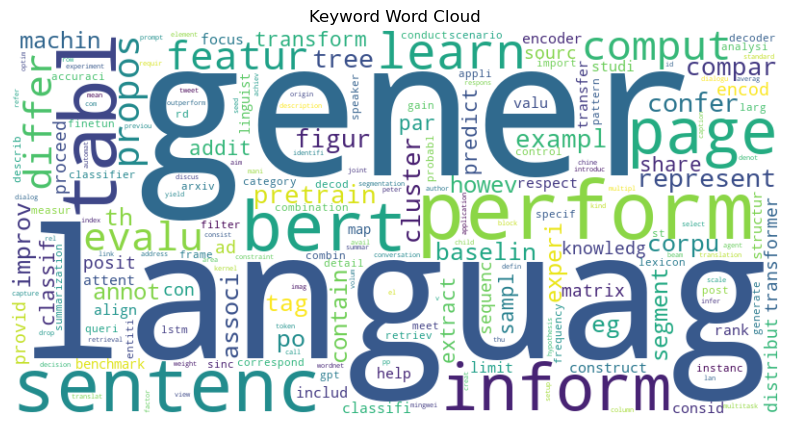

In [16]:
create_wordcloud()  # 워드 클라우드 실행
#create_network_graph()  # 네트워크 그래프 실행
#create_cluster_visualization()  # 클러스터링 시각화 실행

# 키워드에 대한 관계 네트워크 시각화(보류)

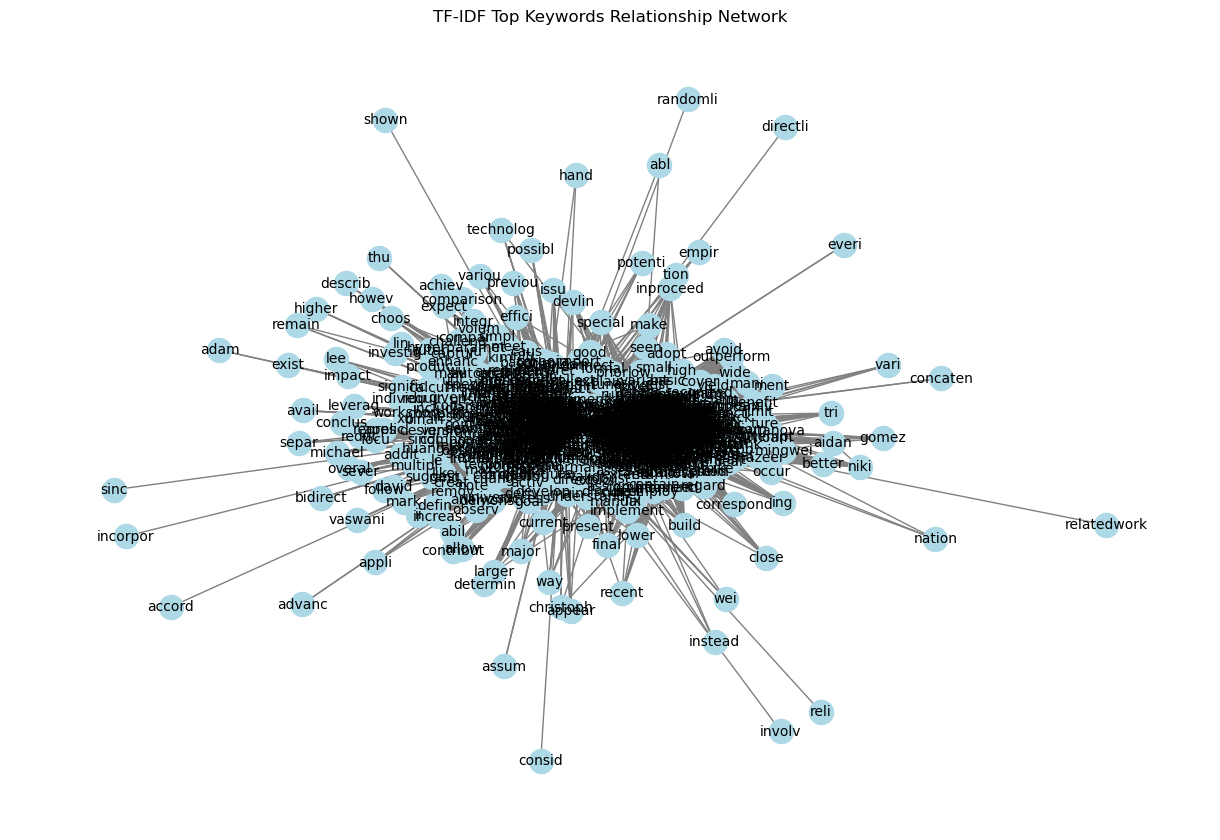

In [21]:
def create_network_graph():
    # TF-IDF로 각 문서에서 상위 10개 키워드 추출
    vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
    X = vectorizer.fit_transform(data['processed'])
    feature_names = vectorizer.get_feature_names_out()

    # 각 문서별로 TF-IDF 점수가 높은 상위 10개 단어 선택
    top_keywords_per_doc = []
    for row in X.toarray():
        top_indices = row.argsort()[-10:][::-1]  # 상위 10개 TF-IDF 점수의 인덱스
        top_keywords = [feature_names[i] for i in top_indices]
        top_keywords_per_doc.append(top_keywords)

    # 상위 키워드 기반으로 Co-occurrence 계산
    co_occurrence = Counter()
    for keywords in top_keywords_per_doc:
        for i, word1 in enumerate(keywords):
            for word2 in keywords[i + 1:]:
                if word1 != word2:
                    co_occurrence[(word1, word2)] += 1

    # 네트워크 그래프 생성
    G = nx.Graph()
    for (word1, word2), weight in co_occurrence.items():
        if weight > 1:  # 연관 강도가 1 이상인 경우만 포함
            G.add_edge(word1, word2, weight=weight)

    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=0.3)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', font_size=10, edge_color='gray')
    plt.title("TF-IDF Top Keywords Relationship Network")
    plt.show()

# 실행
create_network_graph()


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from tqdm import tqdm

# NLTK 필수 리소스 다운로드
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

# CSV 데이터 불러오기
data = pd.read_csv("C:/Users/wpgur/Desktop/Combined_Data2.csv")

# 열 이름 확인 및 필요한 열 선택
print("Columns in the CSV file:", data.columns)
data = data[['Conference', 'Year', 'processed']]  # 실제 열 이름에 맞게 수정

# 1. 데이터 전처리 (NaN 값 및 비문자 데이터 처리)
data['processed'] = data['processed'].fillna('')  # NaN 값을 빈 문자열로 대체
data['processed'] = data['processed'].astype(str)  # 모든 데이터를 문자열로 변환

# 사용자 정의 불용어 리스트 추가
custom_stopwords = [
'et', 'al', '1', '2', '3', '4', '5', '6', '0', 'w', 'x', 'e', 'r', 'p', 'b', 'c', 'f', 'g', 'h', 'j', 'k', 'l', 'm', 'n', 'o', 's', 't', 'u', 'v', 'y', 'z',
    '2019', '2020', '2021', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000', 'task', 'results', 'set', 'use', 'using', 'based', 'methods', 'method', 'training', 'learning', 'language', 'word', 'dataset', 
    'sentence', 'system', 'figure', 'table', 'model', 'models', 'text', 'input', 'performance', 'test', 'work', 'test', 'example', 'approach', 'evaluation', 'corpus', 'knowledge', 'entity', 'experiments', 'systems', 'given', 'show', 'first', 'new', 
    'question', 'target', 'information', 'pages', 'sentences', 'task', 'different', 'number', 'based', 'sentence', '%', '=', '[', ']', '>', '<', '*', 'q', 'data', 'proceedings', 'words', 'translation', 'conference', 'association', 'tasks', 'machine', 
    'datasets', 'section', 'attention', 'source', 'size', 'features', 'analysis', 'time', 'paper', 'score', 'output', 'sequence', 'accuarcy', 'research', 'order', 'chen', 'tion', 'embeddings', 
    'case''accuracy', 'representations', '±', 'θ', '+', 'loss', 'network' , 'problem', 'relation', 'cid', 'cidcid', 're', 'pre',
    'zhang', 'questions', 'similarity', '|', 'function', 'entities', 'pairs', 'labels', 'baseline', 'vector', '@', 'feature', 'parameters', 'cid:1', 'processing', 'wang', 'e.g', 'scores', 'types', 'distribution', 'accuracy', 'case', 'cases', 'layer', 'networks', 'prediction', 'terms', 'term', 'quality', 'documents', 'document', 'relations',
    'process', 'probability', 'metrics', 'cid:48', 'li', 'value', 'detection', 'news', 'state', 'extraction', 'context', 'rate', 'domain', 'structure', 'volume', 'cid:0', 'f1', 'space', 'steps', 'step', 'sets', 'set',
    'event', 'liu', 'image', 'part', 'cid:88', 'papers', 'precision', 'cid:2', 'search', 'class', 'examples', 'pair', 'vectors', 'cid:13', 'label', 'inference', 'graph', 'bleu', 'samples', 'framework', 'frameworks', 'annotation', 'layers', 'way',
    'length', 'development', 'addition', 'cid:16', 'tokens', 'type', 'study', 'base', 'values', 'level', 'cid:9', 'instance' 'sentiment', 'cid:3', 'dependency', 'dialogue', 'topic', 'approaches', 'yang', 'recognition', 'query', 'comparison', 'errors', 'error', 'meeting', 'fact', 'result', 'rules', 'rule', 'chapter', 'lee', 'chang', 'selection', 'speech',
    'instance', 'sentiment', 'instances', 'cid:12', 'code', 'effect', 'cid:10', 'languages', 'baselines', 'users', 'answer', 'improvement', 'α', 'weights', 'memory', 'm.', 'architecture', 'role', 'studies', 'topics', 'tweets', 'mask', 'phrase', 'goal', 'validation',
    'response', 'distance', 'strategy', 'cls', 'difference', 'a.', 'evidence', 'list', 'answers', 'reference', 'settings', 'cid:15', 'j.', 'candidate', 'techniques', 'ability', 'kenton', 'line', 'wu', 'i.e', 'name', 'xu', 'position',
    'annotators', 'cid:17', 'module', 'tions', 'train', 'queries', 'recall', 'sence', 'log', 'form', 'group', 'annotations', 'details', 'longpapers', 'times', 'https', 'points', 'devlin', '/', 'lin',
    'sense', 'workshop', 'correlation', 'version', 'corr', 'hand', 'statistics', 'zhou', 'references', 'resources', 'michael', 'd.', 'mechanism', 'huang', 'events', 'corpora', 'mt', 'cid:11', 'character', 'λ',
    'parser', 'christopher', 'technologies', 'media', 'head', '·', 'note', 'states', 'agreement', 'cid:8', 'algorithm', 'findings', 'cid:5', 'characters', 'problems', 'candidates', 'improvements', 'person'
    'action','nodes', 'acc', 'measure', 'cid:80', 'yu', 'style', 'people', 'cidcidcid', 'cidcid','cid'
    'action', 'person', 'cid:18', 'components', 'authors', 'david', 'mentions', 'collection', 'verb', 'cid:4', 'contrast', 'amount',
    'science', 'wei', 'cid:7', 'kim', 'max', 'clark', 'r.', 'identification', 'support', 'patterns', 'cost', 'advances', 'point', 'batch', 'β',
    'article', 'user', 'category', 'units', 'articles', 'ii', 'world', 'sources', 'hence', 'classes',
    'parameter', 'stage', 'product', 'end', 'john', 'functions', 'ba', 'sep', 'differences', 'computer', 'strategies',
    'vaswani', 'mark', 'cid:19', 'alignment', 'bias', 'reason', 'numbers', 'constraints', 'pipeline', '..',
    'ones', 'zhao', 'daniel', 'c.', 'sun', 'mention', 'comments', 'content',
    'le', 'gao', 'years', 'count', 'gold', 'conclusion', 'prompts', 'emnlp', 'ner', 'impact', 's.',
    'utterances', 'groups', 'idea', 'semantics', 'cid:107', 'cid:21', 'limitations', 'cid', 'cidcid',
    'texts', 'complexity', 'images', 'concepts', 'adam', 'importance', 'others', 'policy', 'arguments', 'sample', 'zhu', 'qa', 'relevance', 'challenge', 'inaddition', 'procedure', 'intelligence', 'choice', 'jones', 'cid:6','dev', 'range',
    'equation', 'dimension', 'history', 'definition', 'issue', 'roberta', 'p.','twitter', 'field', 'gender', 'confidence', 'slot', 'parts', 'distributions', 'tags',
    'argument', 'phrases', 'none', 'kingma', 'location', 'utterance', 'diversity', 'levy', 'cid:105', 'forms', '···', 'ij', 'student', 'forinstance', 'tool', 'coverage', 'passage', 'gap', 'program', 'relationship', 'implementation',
    'wikipedia', 'report', 'variants', 'responses', 'names', 'resolution', 'zettlemoyer', 'expressions', 'direction', 'edge', 'technique', 'generalization', 'noise', 'comprehension', 'path', 'cid:104', 'random', 'ground', 'levels', 'inproceedings', 'effects', 'claim',
    'review', 'cid:22', 'hu', 'items', 'side', 'sides', 'grammar', 'richard', 'lines', 'da', 'opinion', 'design', 'issues', 'ways', 'lm', 'jiang', 'ee', 'access', 'factors', 'ratio', 'unit', 'properties', 'computation', 'health', 'cid:20', 'majority', 'change', 'cid:29', 'technology', 'actions', 'joshi', 'changes', 'ablation', 'effectiveness', 'split', 'application', 'te', 'vision',
    'interaction', 'percentage','ie','P0','PO', 'web', 'llion', 'man', 'van', 'parmar', 'span', 'practice', 'age', 'variety', 'node', 'sutskever', 'success','china', ' ', 'aspects', 'researchers', 'em', 'h.', 'interest', 'match', 'project', 'min', 't.', 'spans', 'phase','story', 'chris', 'jason', 'cs', 'truth', 'concept'
] 
stop_words = set(stopwords.words('english')).union(set(custom_stopwords))  # 기본 불용어 + 커스텀 불용어

# 2. 텍스트 전처리 함수 (명사 및 고유명사 추출)
def extract_keywords(text):
    tokens = word_tokenize(text.lower())  # 소문자 변환 및 토큰화
    tagged_tokens = pos_tag(tokens)  # 품사 태깅
    # 명사(NN, NNP 등)만 추출
    nouns = [token for token, tag in tagged_tokens if tag.startswith('NN') and token not in stop_words]
    return nouns

# 키워드 추출 진행 상황 표시
tqdm.pandas()  # tqdm의 progress_apply 메소드 활성화

# 키워드 추출
data['keywords'] = data['processed'].progress_apply(extract_keywords)  # tqdm을 사용하여 진행 표시
all_keywords = sum(data['keywords'], [])
keyword_counts = Counter(all_keywords)

# 키워드 상위 20개 추출
top_keywords = keyword_counts.most_common(20)
print("Top 20 Keywords:", top_keywords)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wpgur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\wpgur\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wpgur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Columns in the CSV file: Index(['processed', 'Conference', 'Year'], dtype='object')


100%|████████████████████████████████████████████████████████████████████████████| 19762/19762 [22:42<00:00, 14.51it/s]


Top 20 Keywords: [('gener', 30618), ('languag', 27612), ('perform', 25557), ('tabl', 24073), ('sentenc', 21075), ('bert', 18326), ('inform', 16357), ('page', 15579), ('learn', 15392), ('comput', 15226), ('evalu', 13821), ('featur', 13804), ('differ', 13299), ('propos', 11922), ('represent', 11847), ('confer', 11628), ('pretrain', 10797), ('compar', 10686), ('figur', 10648), ('exampl', 10485)]


Top 10 Keywords for Network: ['gener', 'languag', 'perform', 'tabl', 'sentenc', 'bert', 'inform', 'page', 'learn', 'comput']


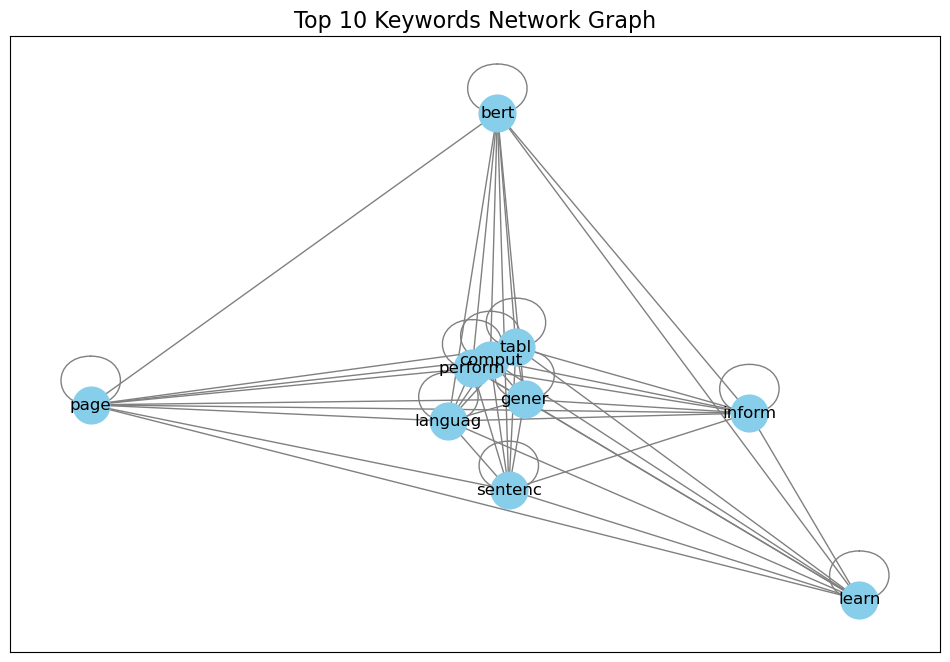

Visualizing Network for EMNLP
Top 10 Keywords for Network: ['gener', 'languag', 'perform', 'tabl', 'sentenc', 'bert', 'inform', 'page', 'learn', 'comput']


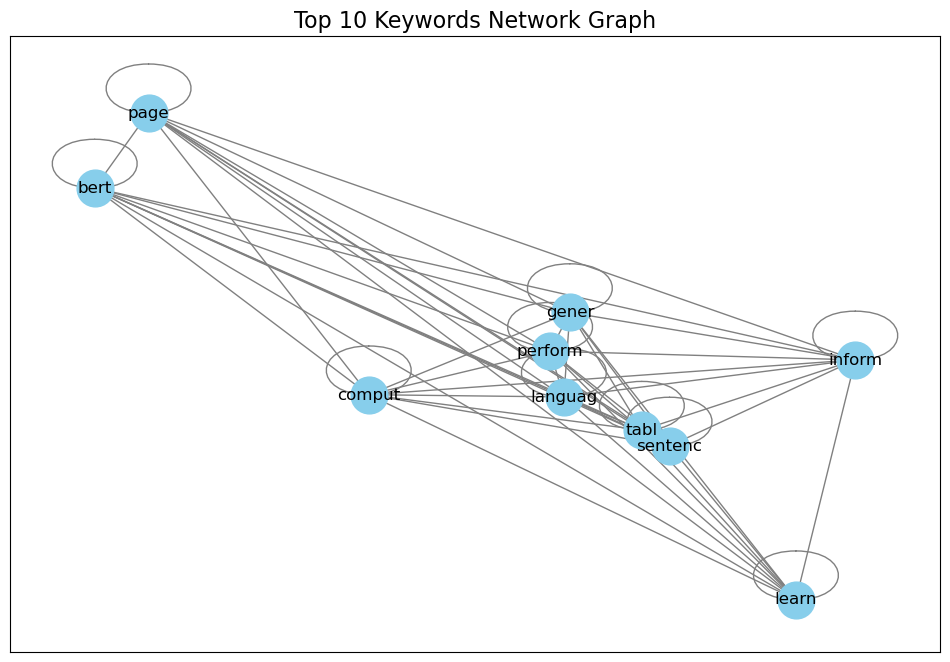

Visualizing Network for coNLL
Top 10 Keywords for Network: ['gener', 'languag', 'perform', 'tabl', 'sentenc', 'bert', 'inform', 'page', 'learn', 'comput']


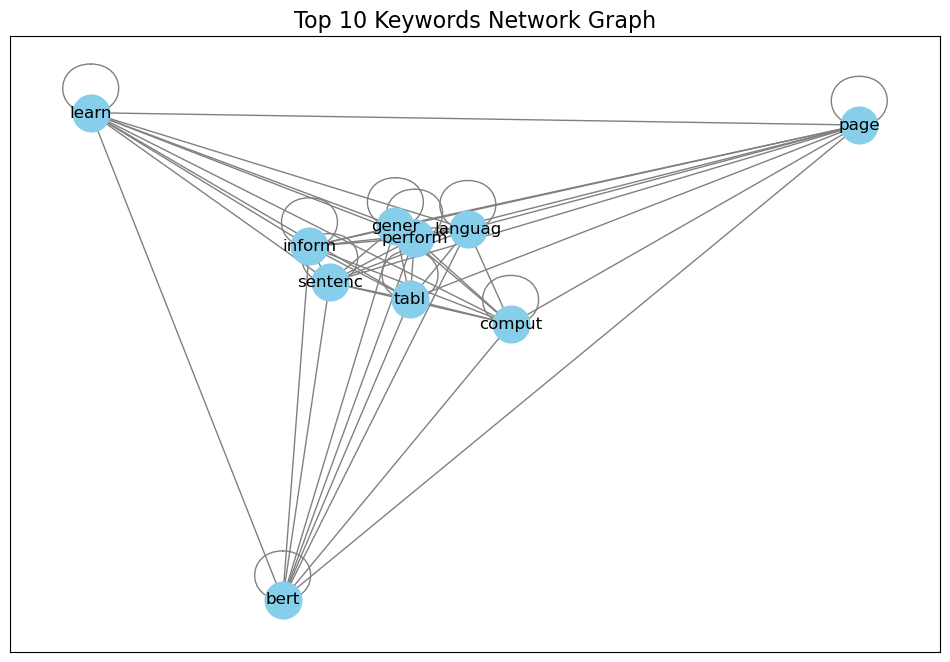

Visualizing Network for ACL
Top 10 Keywords for Network: ['gener', 'languag', 'perform', 'tabl', 'sentenc', 'bert', 'inform', 'page', 'learn', 'comput']


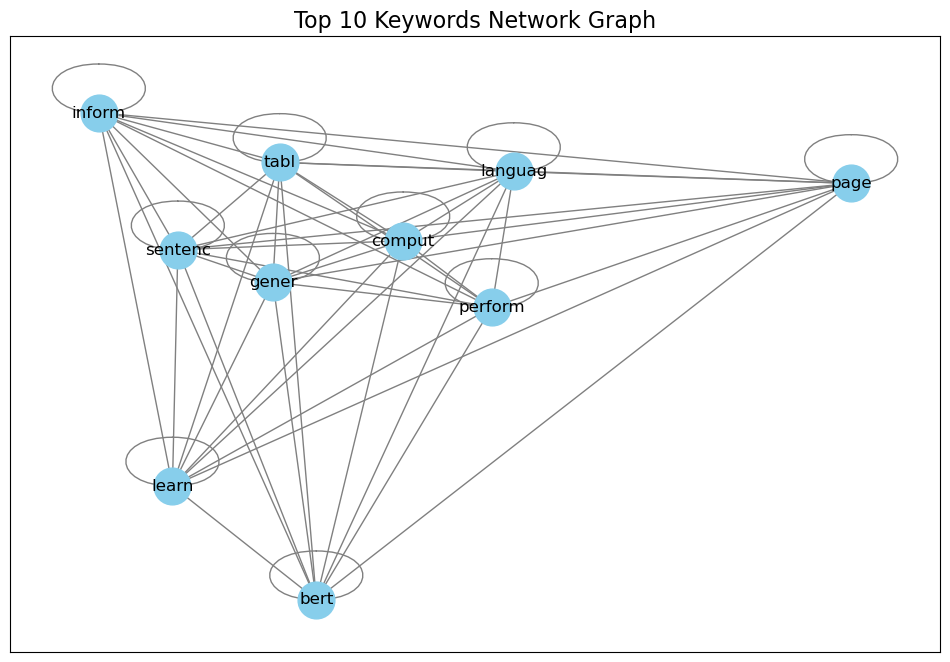

In [60]:
from itertools import combinations
# 3. 키워드 네트워크 생성 함수 (상위 10개 키워드만)
def create_keyword_network(keywords, top_n=10):
    # 상위 N개의 키워드 선택
    top_keywords = [keyword for keyword, _ in keyword_counts.most_common(top_n)]
    print(f"Top {top_n} Keywords for Network: {top_keywords}")
    
    # Co-occurrence 계산
    co_occurrence = Counter()
    for keyword_list in data['keywords']:
        filtered_keywords = [kw for kw in keyword_list if kw in top_keywords]  # 상위 키워드만 포함
        for word1, word2 in combinations(filtered_keywords, 2):  # 두 키워드 간 조합
            co_occurrence[(word1, word2)] += 1
    
    # 네트워크 그래프 생성
    G = nx.Graph()
    for (word1, word2), weight in co_occurrence.items():
        if weight > 1:  # 연결 강도가 1 이상인 경우만 포함
            G.add_edge(word1, word2, weight=weight)
    
    # 그래프 시각화
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=0.3)  # 노드 간 레이아웃
    nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=700)
    nx.draw_networkx_edges(G, pos, edge_color='gray')
    nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')
    plt.title(f"Top {top_n} Keywords Network Graph", fontsize=16)
    plt.show()

# 4. 학회별 키워드 네트워크 시각화 (상위 10개 키워드만)
def visualize_conference_network(conference_name, top_n=10):
    # 학회 데이터 필터링
    conference_data = data[data['Conference'] == conference_name]
    all_conference_keywords = sum(conference_data['keywords'], [])
    conference_keyword_counts = Counter(all_conference_keywords)
    
    # 학회별 네트워크 생성
    print(f"Visualizing Network for {conference_name}")
    create_keyword_network(all_conference_keywords, top_n=top_n)

# 전체 데이터 키워드 네트워크 시각화 (전체 상위 10개 키워드)
create_keyword_network(all_keywords, top_n=10)

# 학회별 키워드 네트워크 시각화 (각 학회마다 상위 10개 키워드)
for conference in data['Conference'].unique():
    visualize_conference_network(conference, top_n=10)


# 트랜드 분석을 위한 특정 키워드의 연도별 등장 빈도 시각화

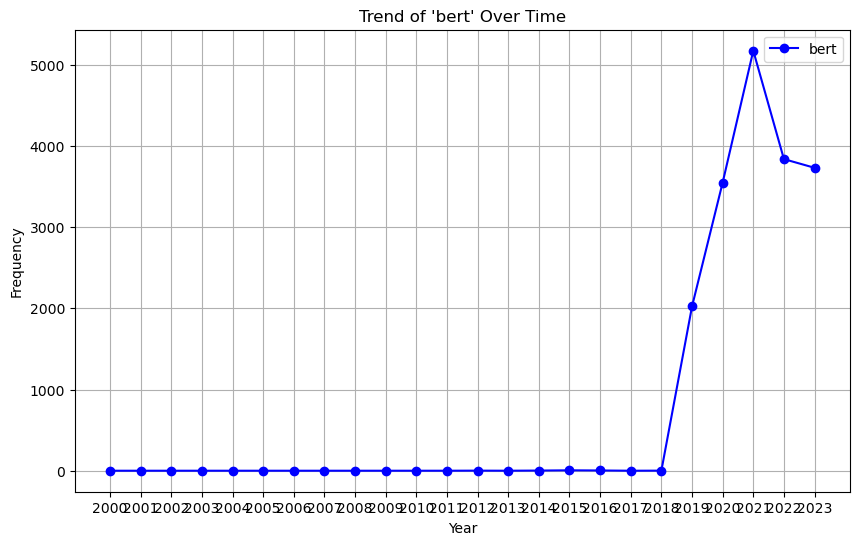

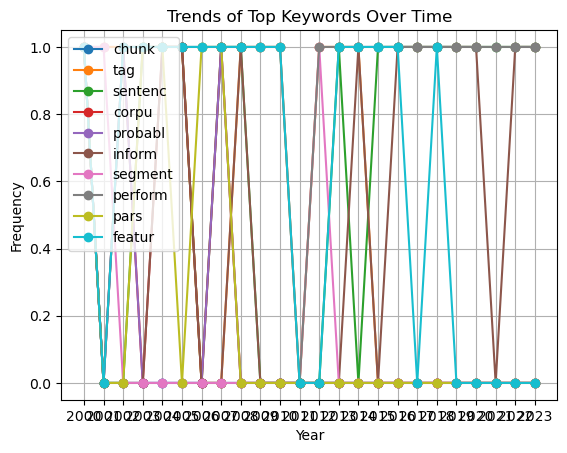

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. 연도별 키워드 등장 빈도 집계
def get_keyword_trends(data, top_n=10):
    # 각 연도별로 등장한 키워드를 집계
    data['Year'] = data['Year'].astype(str)  # 연도를 문자열로 변환 (혹시 숫자로 되어 있으면)
    
    keyword_trends = {}
    
    for year in data['Year'].unique():
        year_data = data[data['Year'] == year]
        all_keywords = sum(year_data['keywords'], [])
        keyword_counts = Counter(all_keywords)
        
        # 상위 N개의 키워드만 저장
        top_keywords = [keyword for keyword, _ in keyword_counts.most_common(top_n)]
        keyword_trends[year] = top_keywords
    
    return keyword_trends

# 2. 특정 키워드의 연도별 등장 빈도 시각화
def plot_keyword_trends(data, keyword):
    # 키워드 등장 빈도 계산
    keyword_trends = {year: 0 for year in data['Year'].unique()}
    
    for year in data['Year'].unique():
        year_data = data[data['Year'] == year]
        all_keywords = sum(year_data['keywords'], [])
        keyword_trends[year] = all_keywords.count(keyword)
    
    # 시각화
    plt.figure(figsize=(10, 6))
    plt.plot(list(keyword_trends.keys()), list(keyword_trends.values()), marker='o', color='b', label=keyword)
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.title(f"Trend of '{keyword}' Over Time")
    plt.grid(True)
    plt.legend()
    plt.show()

# 3. 전체 키워드 트렌드 시각화
def plot_all_keywords_trends(data, top_n=10):
    # 연도별로 각 키워드의 빈도 집계
    keyword_trends = get_keyword_trends(data, top_n)
    
    # 상위 N개 키워드에 대해 연도별 트렌드를 시각화
    for keyword in keyword_trends[list(keyword_trends.keys())[0]]:  # 첫 번째 연도의 키워드들
        keyword_counts_by_year = {year: 0 for year in keyword_trends}
        for year in keyword_trends:
            if keyword in keyword_trends[year]:
                keyword_counts_by_year[year] = 1  # 등장 여부를 1로 표시 (다시 빈도로 변환 가능)
        
        plt.plot(list(keyword_counts_by_year.keys()), list(keyword_counts_by_year.values()), marker='o', label=keyword)
    
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.title('Trends of Top Keywords Over Time')
    plt.grid(True)
    plt.legend(loc='upper left')
    plt.show()

# 특정 키워드의 트렌드 분석 (예: "attention")
plot_keyword_trends(data, keyword="bert")

# 전체 키워드 트렌드 분석 (상위 10개 키워드)
plot_all_keywords_trends(data, top_n=10)


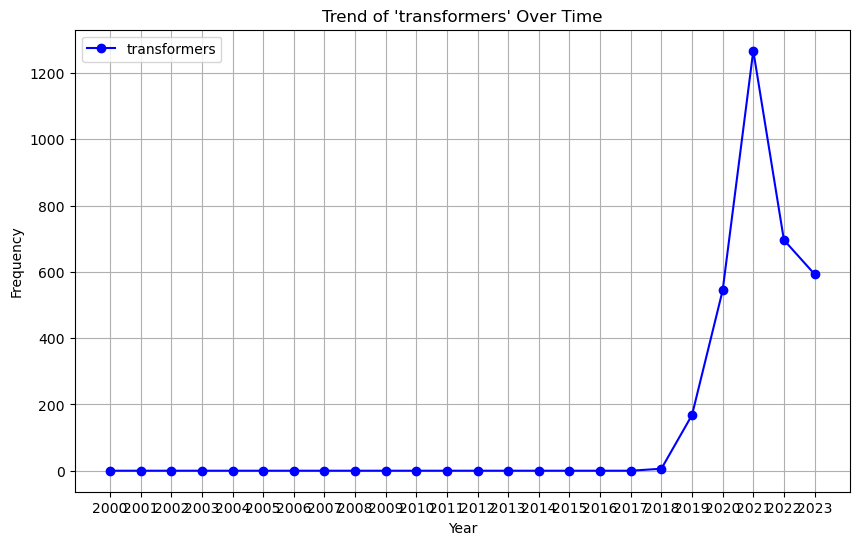

In [31]:
plot_keyword_trends(data, keyword="transformers")

In [40]:
import matplotlib.pyplot as plt

def plot_keyword_trends(data):
    # 사용자로부터 키워드 입력 받기
    keyword = input("키워드를 입력하세요: ")

    # 키워드 등장 빈도 계산
    keyword_trends = {year: 0 for year in data['Year'].unique()}
    
    for year in data['Year'].unique():
        year_data = data[data['Year'] == year]
        all_keywords = sum(year_data['keywords'], [])
        keyword_trends[year] = all_keywords.count(keyword)
    
    # 시각화
    plt.figure(figsize=(10, 6))
    plt.plot(list(keyword_trends.keys()), list(keyword_trends.values()), marker='o', color='b', label=keyword)
    
    # x축 레이블 기울이기
    plt.xticks(rotation=45)
    
    # 제목 및 레이블 추가
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.title(f"Trend of '{keyword}' Over Time")
    plt.grid(True)
    plt.legend()
    
    # 화면에 출력
    plt.tight_layout()  # 레이블이 겹치지 않도록 레이아웃 조정
    plt.show()

키워드를 입력하세요:  bert


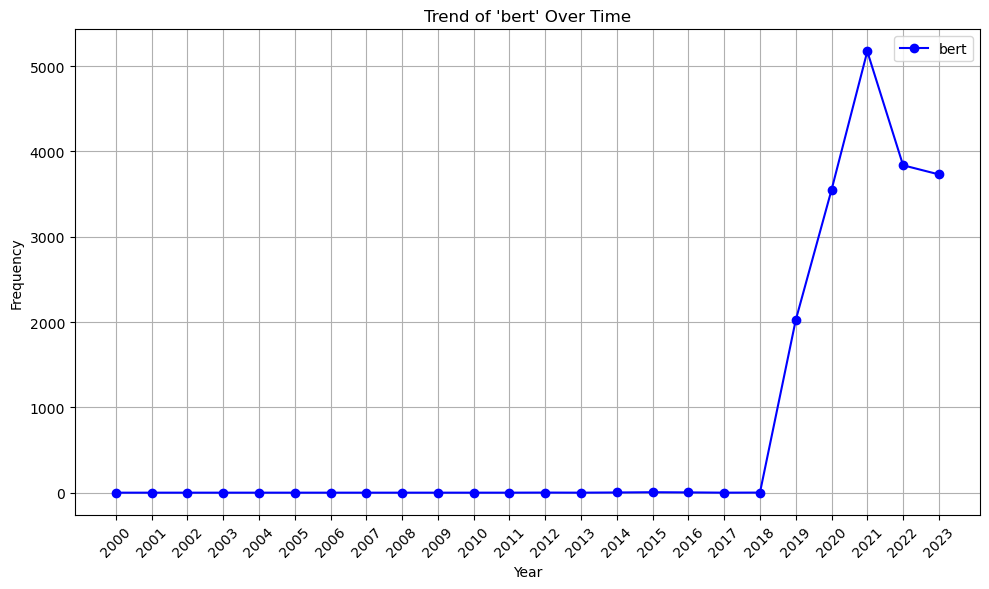

In [46]:
plot_keyword_trends(data)

키워드를 입력하세요:  transformers


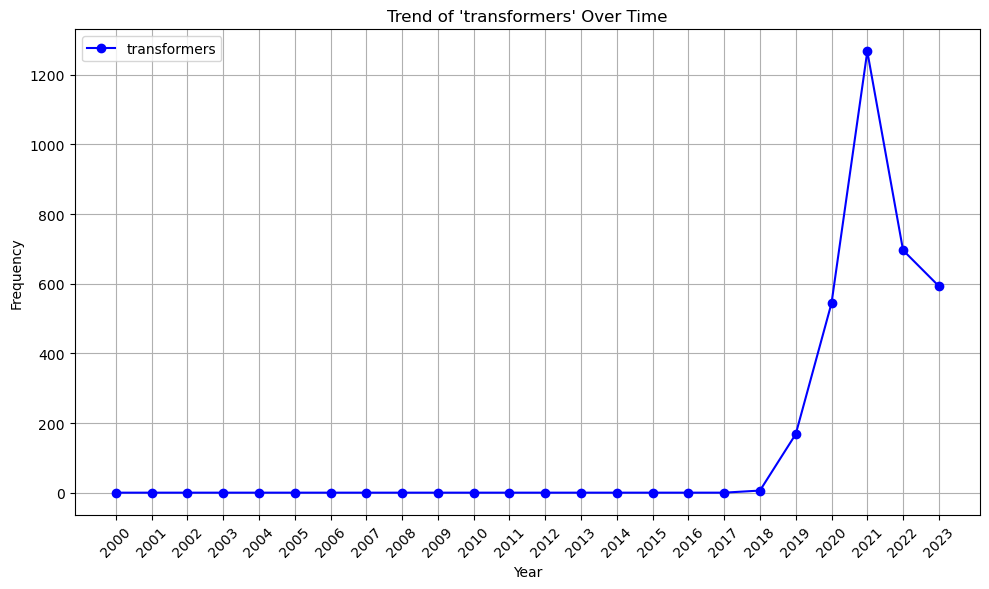

In [51]:
plot_keyword_trends(data)

키워드를 입력하세요:  gpt


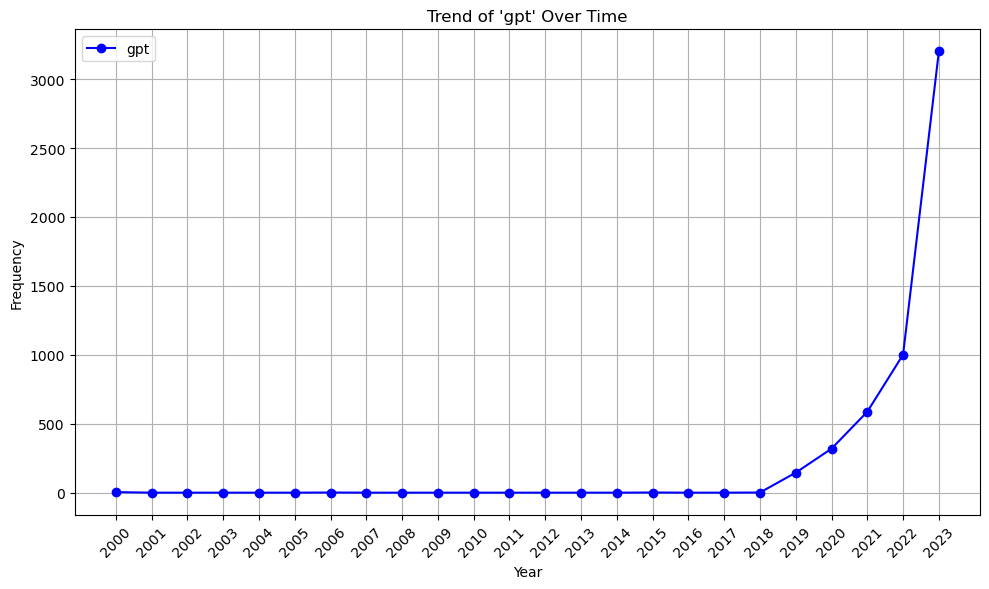

In [49]:
plot_keyword_trends(data)

키워드를 입력하세요:  lstm


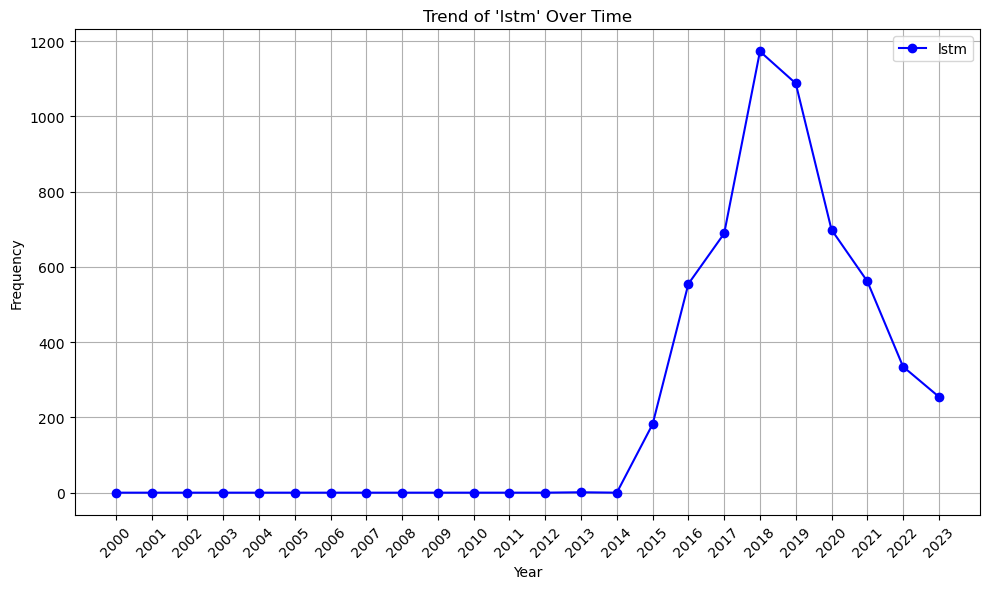

In [55]:
plot_keyword_trends(data)

키워드를 입력하세요:  llms


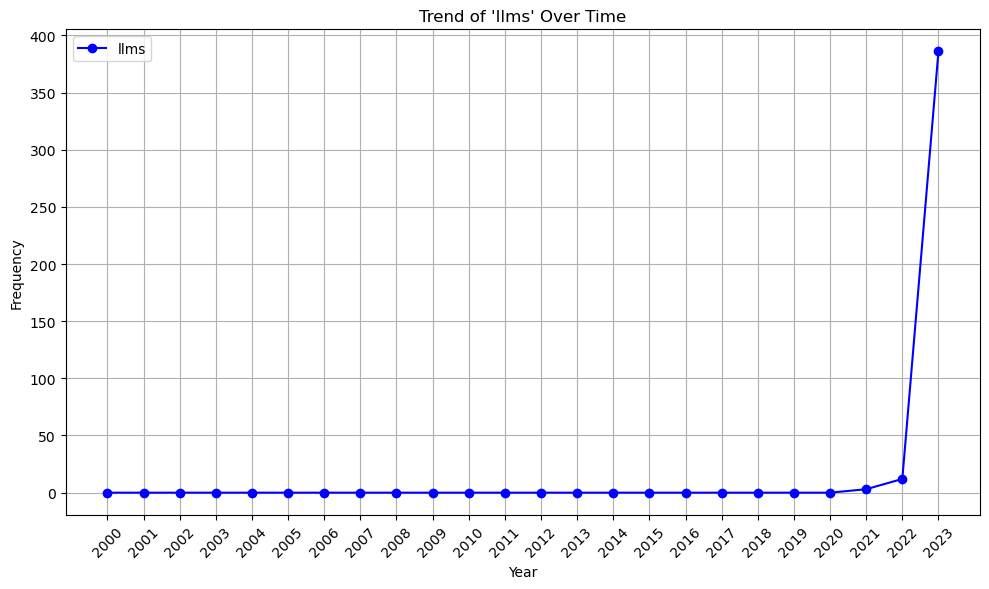

In [59]:
plot_keyword_trends(data)

키워드를 입력하세요:  transformer


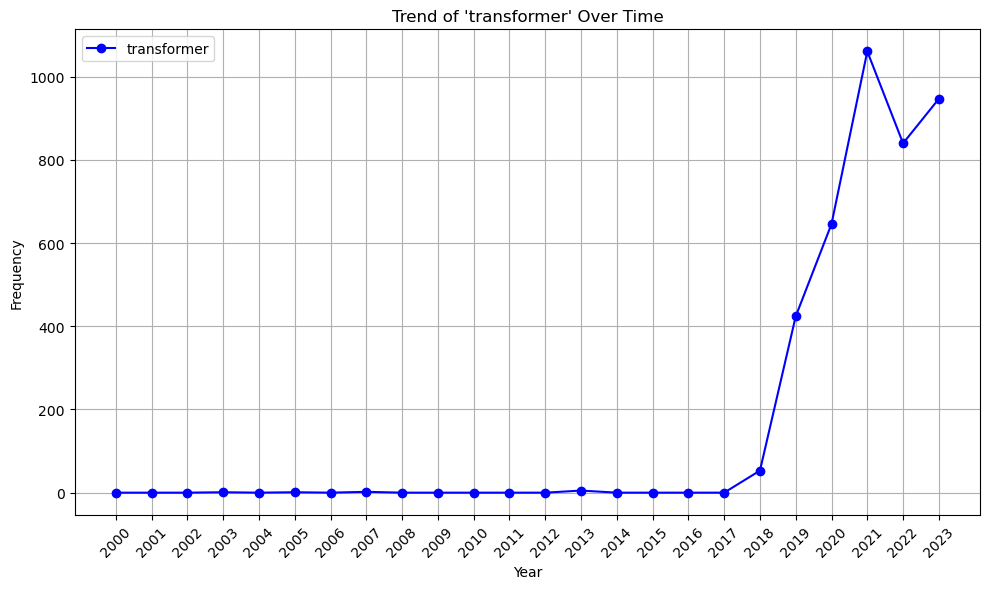

In [63]:
plot_keyword_trends(data)